In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('train.csv')
df1.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
5,50509046,34631,30203,8635.931613,36,BAT4694572,17.246986,B,G5,RENT,...,5.043575,0.581688,0,INDIVIDUAL,32,0,42,51252,27480,0
6,32737431,30844,19773,15777.511830,59,BAT4808022,10.731432,C,C5,RENT,...,3.167937,0.553076,0,INDIVIDUAL,71,0,3388,42069,31068,0
7,63151650,20744,10609,7645.014802,58,BAT2558388,13.993688,A,A5,OWN,...,0.098448,0.047589,0,INDIVIDUAL,87,0,48,184909,43303,0
8,4279662,9299,11238,13429.456610,59,BAT5341619,11.178457,G,C2,MORTGAGE,...,0.530214,0.216985,0,INDIVIDUAL,144,0,26,68126,7482,0
9,4431034,19232,8962,7004.097481,58,BAT2078974,5.520413,C,B5,RENT,...,2.912215,0.886864,0,INDIVIDUAL,9,0,35,71650,14871,0


In [3]:
# Checking the missing value
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [4]:
# The data does not have null data. 
# And this is a classification task to predict whether a person will be a loan defaulter.
train_n = []
train_c = []
for i in df1.columns:
  if df1[i].dtype != 'object':
    train_n.append(i)
  else:
    train_c.append(i)

#df_train_n contains numerical features
#df_train_c contains categorical features
df_train_n = df1[train_n]
df_train_c = df1[train_c] 

In [5]:
df_train_n.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Interest Rate                   67448
Home Ownership                  67454
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection Recovery Fee         67313
Collection 12 months Medical        2
Last week Pay                     162
Accounts Delinquent                 1
Total Collection Amount          2193
Total Current Balance           60901
Total Revolving Credit Limit    37708
Loan Status                         2
dtype: int64

In [6]:
df_train_n.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [7]:
df_train_c.nunique()

Batch Enrolled          41
Grade                    7
Sub Grade               35
Employment Duration      3
Verification Status      3
Payment Plan             1
Loan Title             109
Initial List Status      2
Application Type         2
dtype: int64

In [8]:
#We drop or encode features to avoid overfiting because of too many features

#Remove ID because it's just a primary key
#Remove Accounts Delinquent because it has only 1 unique value
df_train_n = df_train_n.drop(['ID', 'Accounts Delinquent'], axis = 1)
#Remove Payment Plan because it has only 1 unique value
df_train_c = df_train_c.drop(['Payment Plan'], axis = 1)

#Remove numerical features if they have low standard deviation because they won't make much difference
for i in df_train_n.columns:
  if i != 'Loan Status':
    if df_train_n[i].std() <= 10:
      df_train_n = df_train_n.drop([i], axis = 1)

#Encode the categorical data with lots of unique values by its frequency. Replace it by its frequency
for i in df_train_c.columns:
  if df_train_c[i].nunique() >= 8:
    f = df_train_c[i].value_counts() / len(df_train_c)
    f = dict(f)
    df_train_c[i] = df_train_c[i].replace(f) 

df_train_n.shape

(67463, 13)

Text(0.5, 1.0, 'Correlation of dataframe variables')

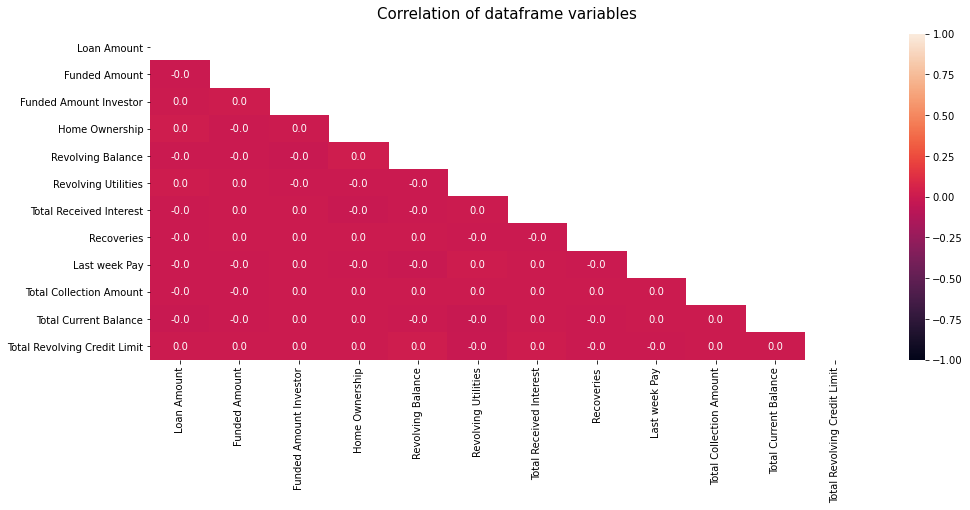

In [9]:
df_corr = df_train_n.iloc[:, 0:12]

# use pairplot to check the independence of features
plt.figure(figsize=(16,6))
# define the mask to set the values in the upper triangle to True
pltgraph = np.triu(np.ones_like(df_corr.corr(), dtype = np.bool))
heatmap_graph = sns.heatmap(df_corr.corr(),mask=pltgraph, vmin=-1, vmax=1, fmt='.1f',annot=True)
heatmap_graph.set_title('Correlation of dataframe variables', fontdict={'fontsize':15}, pad=15)

In [10]:
df_train_n.groupby('Loan Status').count()

,Loan Amount,Funded Amount,Funded Amount Investor,Home Ownership,Revolving Balance,Revolving Utilities,Total Received Interest,Recoveries,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
Loan Status,,,,,,,,,,,,
0,61222,61222,61222,61222,61222,61222,61222,61222,61222,61222,61222,61222
1,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241


In [11]:
#Because this is a so unbalance dataset. There are 61222 rows has target label 0 and only 6241 rows has target label 1
#We take part of the data and create a more balanced numerical dataset

df_1 = df_train_n[df_train_n['Loan Status'] == 1]

df_0 = df_train_n[df_train_n['Loan Status'] == 0]
df_0 = df_0.sample(n = len(df_1), random_state = 1)

#df_train_b is a more balanced numerical dataset
df_train_b = pd.concat([df_0, df_1])
df_train_b.shape

(12482, 13)

In [12]:
#Create dummy variables for categorical data
df_train_c = pd.get_dummies(df_train_c)

#Split 70% of train set and 30% of test set
x_train, x_test, y_train, y_test = train_test_split(df_train_b.iloc[:, 0:12], df_train_b.iloc[:, -1], 
                                                    test_size = 0.3, random_state = 1)
train_index = x_train.index
test_index = x_test.index

# To standardize dependent variables
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

#Combine standardized numerical features and categorical features together
x_train = pd.DataFrame(x_train, columns = df_corr.columns)
x_train.index = train_index
x_test = pd.DataFrame(x_test, columns = df_corr.columns)
x_test.index = test_index

#Join by index
x_train = x_train.join(df_train_c)
x_test = x_test.join(df_train_c)

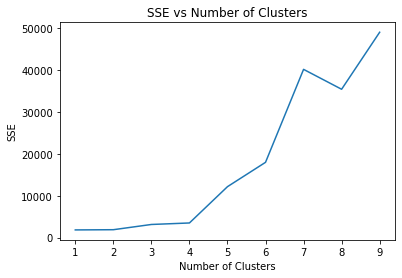

In [13]:
#K-means
#Plot SSE vs Number of Clusters to determine which K value we choose
SSE = []
k_list = range(1, 10)
for k in k_list:
  km = KMeans(n_clusters = k, n_init = 1, random_state = 1).fit(x_train)
  predicted = km.predict(x_test)

  sse = np.sum((y_test - predicted) ** 2)
  SSE.append(sse)

plt.plot(k_list, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('SSE vs Number of Clusters')
plt.show()

In [14]:
#We choose k = 2
km = KMeans(n_clusters = 2, n_init = 1, random_state = 1).fit(x_train)
predicted = km.predict(x_test)

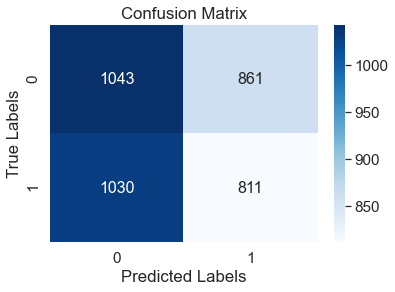

In [15]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predicted)

# Plot confusion matrix
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
# Calculate precision
precision = precision_score(y_test, predicted)
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, predicted)
print('Recall:', recall)

# Calculate F1-score
f1 = f1_score(y_test, predicted)
print('F1-score:', f1)

Precision: 0.48504784688995217
Recall: 0.4405214557305812
F1-score: 0.461713635069741


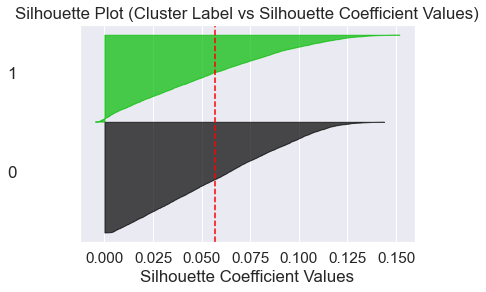

In [17]:
#Silhouette plot
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate the silhouette score for each data point
labels = km.fit_predict(x_train)
silhouette_avg = silhouette_score(x_train, labels)
sample_silhouette_values = silhouette_samples(x_train, labels)

# Create a vertical bar plot of the silhouette scores for each data point
y_lower = 10
n_clusters = 2
for i in range(n_clusters):
    # Aggregate the silhouette scores for all data points assigned to the i-th cluster
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Assign a color to the cluster
    color = plt.cm.nipy_spectral(float(i) / n_clusters)

    # Plot the silhouette scores for the data points in the i-th cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plot with the cluster number
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

# Add labels and title to the plot
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette Coefficient Values")
plt.yticks([])
plt.title("Silhouette Plot (Cluster Label vs Silhouette Coefficient Values)")
plt.show()

In [18]:
# Decide best K value
n_neighbors = list(range(3,15))

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
from sklearn.model_selection import GridSearchCV
best_model = GridSearchCV(knn, hyperparameters, cv=5, scoring = 'f1_macro').fit(x_test,y_test)

#Print The value of best Hyperparameters
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 5


In [19]:
# Set new model
# k = 5
knn= KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

# Predict
y_pred =  knn.predict(x_test)

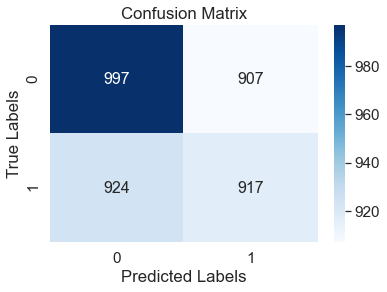

In [20]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [21]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print('F1-score:', f1)

Precision: 0.5027412280701754
Recall: 0.49809885931558934
F1-score: 0.5004092769440655


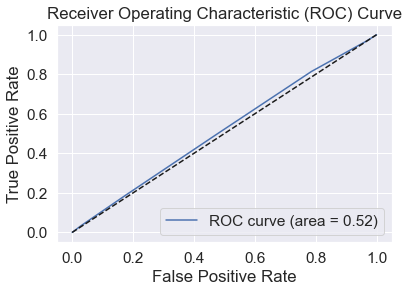

In [22]:
from sklearn.metrics import roc_curve, auc
# ROC curve for model with optimized hyperparamters
#Calculate y score
y_proba = knn.predict_proba(x_test)
y_scores = y_proba[:, 1]

#Build ROC curve for KNN
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()